In [3]:
import pandas as pd
# Đọc dữ liệu từ file CSV (có thể thay bằng file của bạn)
#df = pd.read_csv('VCB_hose.csv')
file_path = r'D:\DeTaiNam2024\SolieuHong\VCB.csv'
df = pd.read_csv(file_path)
# Kiểm tra tiêu đề các cột
df.head()

,Unnamed: 0,time,open,high,low,close,volume
0,0,2015-01-05,14.03,14.21,13.90,14.12,310010
1,1,2015-01-06,14.12,15.05,14.12,15.05,1684600
2,2,2015-01-07,15.09,15.31,14.65,14.87,1430340
3,3,2015-01-08,14.92,15.49,14.87,15.31,904240
4,4,2015-01-09,15.45,16.38,15.45,16.33,2286680


In [4]:
# Sắp xếp theo ngày
df = df.sort_values('time')

In [3]:
print(df.isnull().sum()) 

Unnamed: 0    0
time          0
open          0
high          0
low           0
close         0
volume        0
dtype: int64


In [5]:
df = df.dropna()
# Hoặc thay thế giá trị thiếu bằng giá trị trung bình
df.fillna(df.mean(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13148\3782368347.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [8]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')

In [9]:
df = df.sort_values('time')

In [10]:
df['Price Change'] = df['close'].pct_change()

In [11]:
df['MA_20'] = df['close'].rolling(window=20).mean()

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['close', 'volume']] = scaler.fit_transform(df[['close', 'volume']])


In [10]:
df

,Unnamed: 0,time,open,high,low,close,volume,Price Change,MA_20
0,0,2015-01-05,14.03,14.21,13.90,0.000000,0.042669,NaN,NaN
1,1,2015-01-06,14.12,15.05,14.12,0.011167,0.231864,0.065864,NaN
2,2,2015-01-07,15.09,15.31,14.65,0.009006,0.196868,-0.011960,NaN
3,3,2015-01-08,14.92,15.49,14.87,0.014289,0.124457,0.029590,NaN
4,4,2015-01-09,15.45,16.38,15.45,0.026537,0.314732,0.066623,NaN
...,...,...,...,...,...,...,...,...,...
2421,2421,2024-09-13,89.80,90.20,89.10,0.909942,0.223633,0.004469,90.450
2422,2422,2024-09-16,89.60,90.00,88.80,0.897935,0.100159,-0.011123,90.515
2423,2423,2024-09-17,89.00,90.50,88.60,0.917147,0.133618,0.017998,90.635
2424,2424,2024-09-18,90.60,91.90,89.70,0.923151,0.236901,0.005525,90.745


In [21]:
df.to_csv('VCB_processed.csv', index=False)

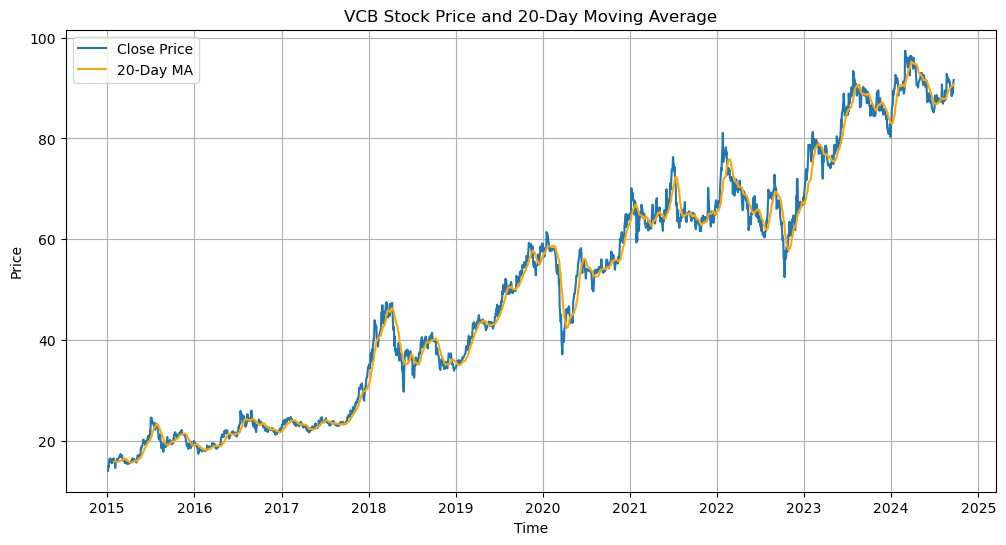

In [12]:
import matplotlib.pyplot as plt
# Vẽ giá đóng cửa và đường trung bình động 20 ngày
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['close'], label='Close Price')
plt.plot(df['time'], df['MA_20'], label='20-Day MA', color='orange')
plt.title('VCB Stock Price and 20-Day Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
print(df.describe())

        Unnamed: 0         open         high          low        close  \
count  2426.000000  2426.000000  2426.000000  2426.000000  2426.000000   
mean   1212.500000    49.872168    50.451055    49.319757    49.898421   
std     700.470199    23.774887    23.971520    23.555266    23.771725   
min       0.000000    14.030000    14.210000    13.900000    14.120000   
25%     606.250000    23.920000    24.130000    23.670000    23.850000   
50%    1212.500000    50.785000    51.560000    50.395000    51.010000   
75%    1818.750000    66.890000    67.740000    65.940000    66.860000   
max    2425.000000    98.500000   100.500000    97.300000    97.400000   

             volume  Price Change        MA_20  
count  2.426000e+03   2425.000000  2407.000000  
mean   1.255187e+06      0.000934    49.873954  
std    8.142480e+05      0.018069    23.579400  
min    0.000000e+00     -0.070018    15.703000  
25%    7.026650e+05     -0.008520    23.850250  
50%    1.058500e+06      0.000000    50

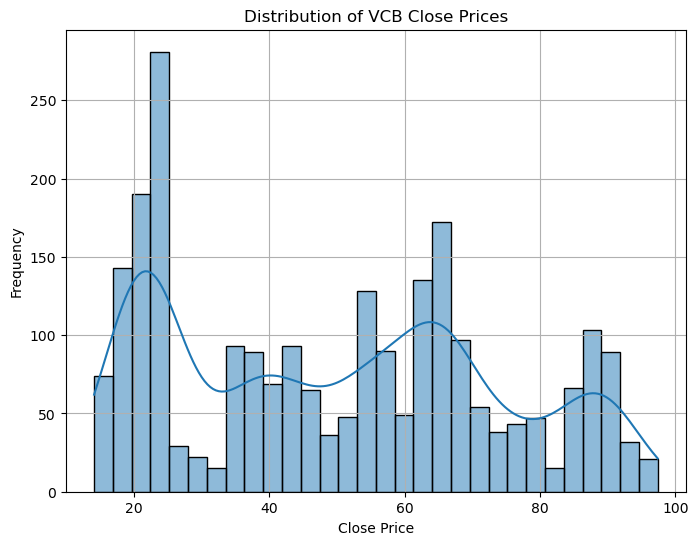

In [13]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(df['close'], bins=30, kde=True)
plt.title('Distribution of VCB Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


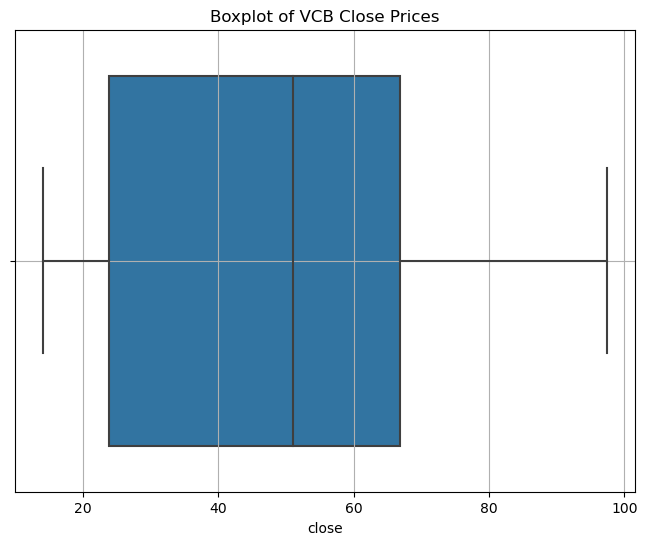

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(df['close'])
plt.title('Boxplot of VCB Close Prices')
plt.grid(True)
plt.show()


In [16]:
df = df.drop('time', axis=1)

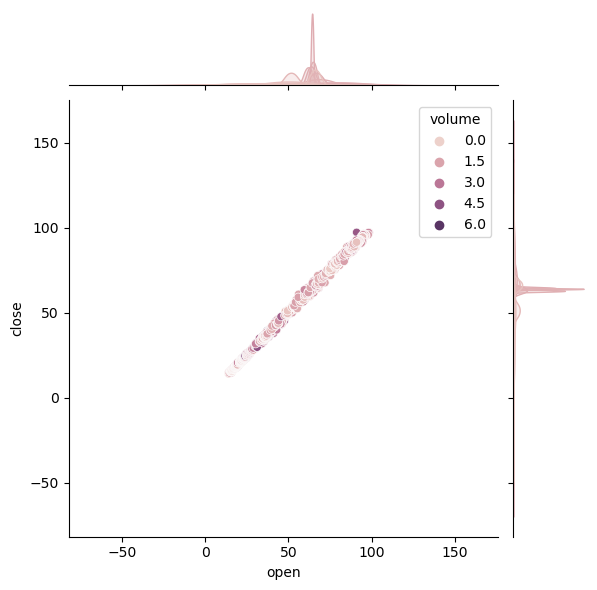

In [20]:
sns.jointplot(data=df, x='open', y='close', hue='volume')